In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost

C:\Users\joeyh\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
df = pd.read_csv('Airlines.csv')

In [4]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
df.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


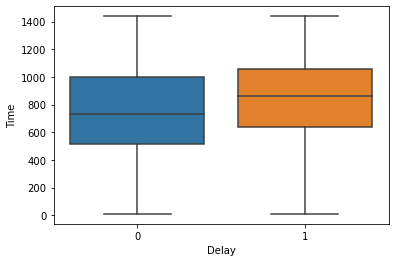

In [7]:
sns.boxplot(x='Delay',y = 'Time',data = df)

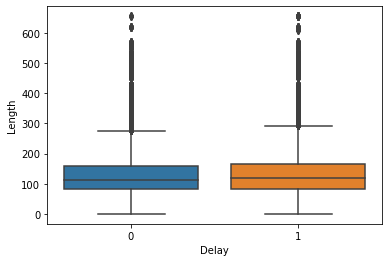

In [8]:
sns.boxplot(x='Delay',y = 'Length',data=df)

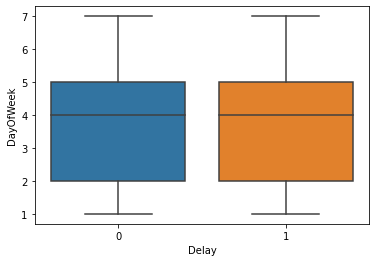

In [9]:
sns.boxplot(x='Delay',y = 'DayOfWeek',data=df)

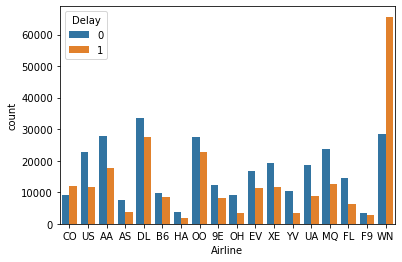

In [10]:
sns.countplot(data = df, x = 'Airline',hue = 'Delay')

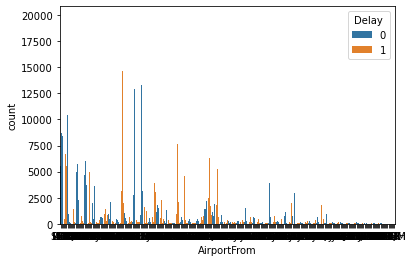

In [11]:
sns.countplot(data=df, x='AirportFrom', hue='Delay')

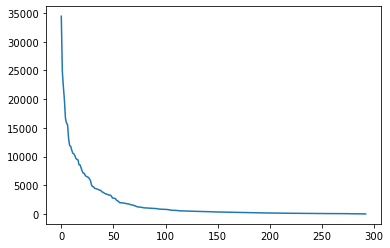

In [12]:
airfrom = df['AirportFrom'].value_counts()
plt.plot(range(len(airfrom)), airfrom)

In [13]:
df['AirportFrom'] = df['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

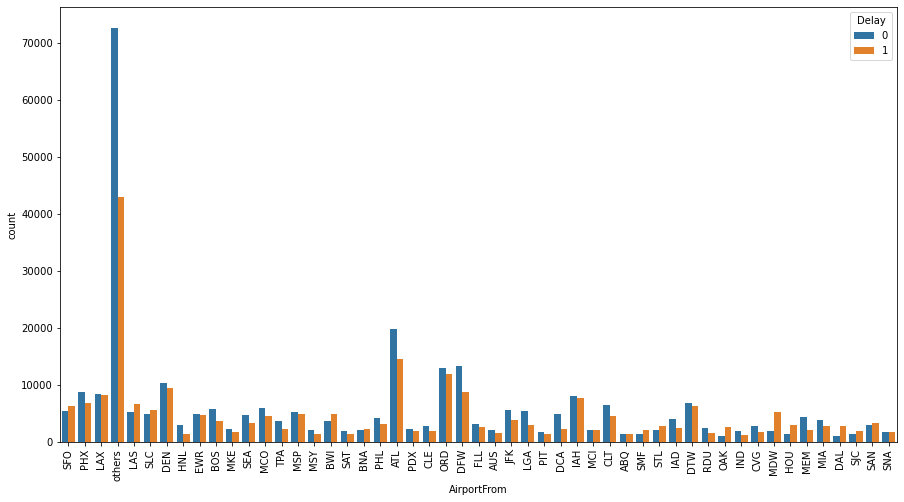

In [14]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)

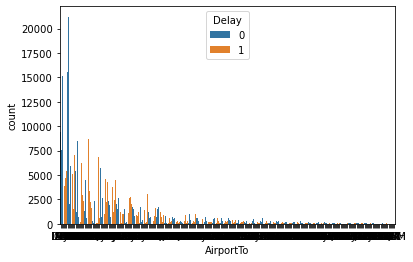

In [15]:
sns.countplot(data=df, x='AirportTo', hue='Delay')

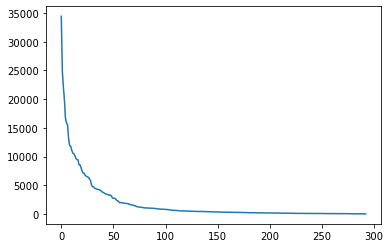

In [16]:
airto = df['AirportTo'].value_counts()
plt.plot(range(len(airto)), airto)

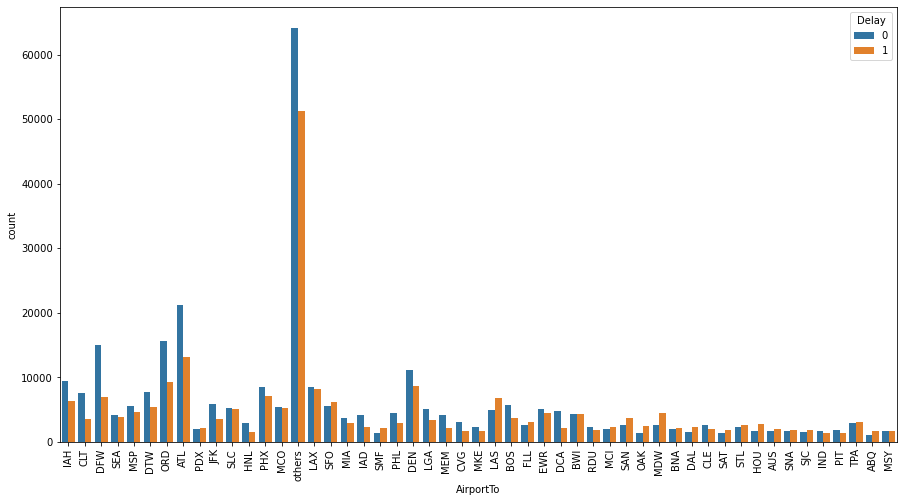

In [17]:
df['AirportTo'] = df['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others')
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='AirportTo', hue='Delay')
plt.xticks(rotation=90)
plt.show()

In [18]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]
X.drop(columns = ['id'],inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019F4F800940>,
      dtype=object)

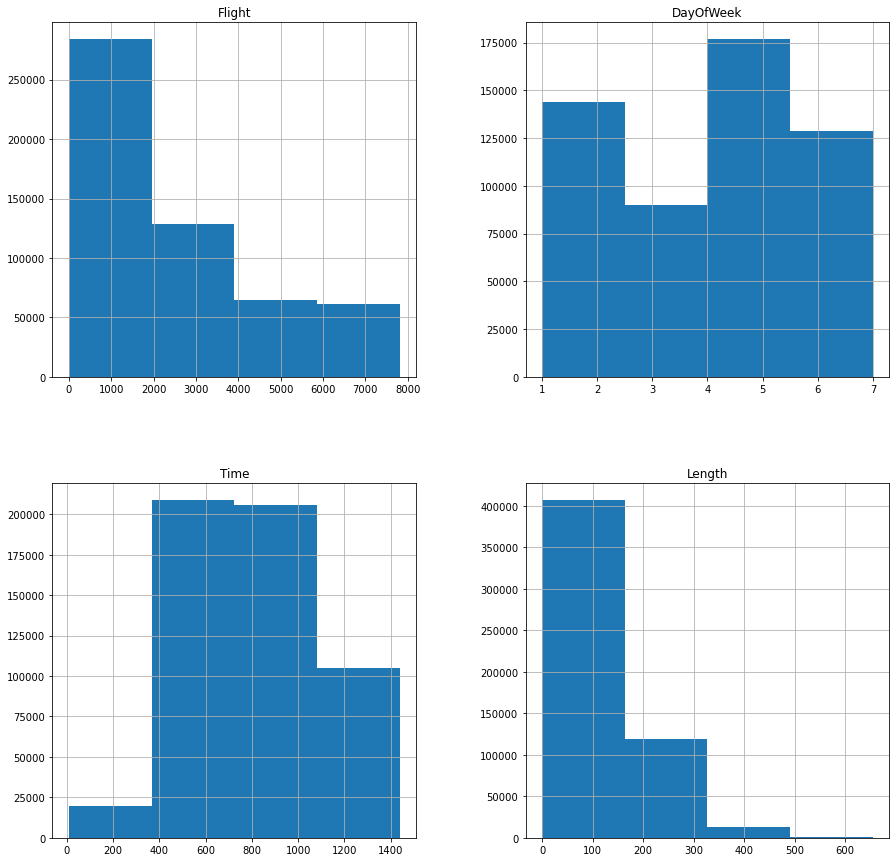

In [19]:
X.hist(figsize = (15,15),bins = 4)

In [20]:
#convert the categorical data to numerical data
label_encoder = LabelEncoder()
cat = ['Airline','AirportFrom','AirportTo']
for i in cat:
    trans_data = label_encoder.fit_transform(X[i].values.astype('str').ravel())
    X[i] = trans_data

In [21]:
X.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,4,269,43,19,3,15,205
1,14,1558,37,7,3,15,222
2,1,2400,23,12,3,20,165
3,1,2466,43,12,3,20,195
4,2,108,50,42,3,30,202


In [22]:
StandardScaler = StandardScaler()
scaled_X = StandardScaler.fit_transform(X)
X = pd.DataFrame(scaled_X,columns = X.columns)

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [24]:
X_train.shape

(431506, 7)

In [25]:
X_test.shape

(107877, 7)

In [26]:
classifier = xgboost.XGBClassifier()
classifier.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
pred = classifier.predict(X_test)

In [28]:
pred = pd.DataFrame(pred,index = Y_test.index)

In [29]:
final_pred = pd.concat([Y_test,pred],axis = 1)
final_pred['id'] = final_pred.index+1

In [30]:
final_pred

,Delay,0,id
442150,1,1,442151
229730,1,0,229731
69994,1,1,69995
414293,0,0,414294
171704,1,0,171705
...,...,...,...
290929,1,0,290930
466596,0,0,466597
392244,0,0,392245
502274,0,1,502275
